In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
import math

In [122]:
n = 32
t = 32
tg = 2
tb = t - tg

N = list(range(n))
I = random.sample(N, t)
Ig = random.sample(I, tg)
Ib = I.copy()
for x in Ig:
    Ib.remove(x)

amps_init = np.zeros(n)
colors_ch = ["#1f77b4"] * n

for x in Ig:
    amps_init[x] = 1/math.sqrt(t)
    colors_ch[x] = "#2eb82e"
for x in Ib:
    amps_init[x] = 1/math.sqrt(t)

In [123]:
def grover_rotation(amps, I, t, Ig):
    amps_prep = amps.copy()
    for x in Ig:
        amps_prep[x] = - amps_prep[x]
    mean = np.sum(amps_prep) / t
    amps_next = amps_prep.copy()
    for x in I:
        amps_next[x] = 2*mean - amps_next[x]
    return amps_prep, amps_next

In [147]:
gr_amps_prep, gr_amps_next = grover_rotation(amps_init, I, t, Ig)
amps_prep_list = [gr_amps_prep]
amps_next_list = [gr_amps_next]
for i in range(19):
    gr_amps_prep, gr_amps_next = grover_rotation(amps_next_list[i], I, t, Ig)
    amps_prep_list.append(gr_amps_prep)
    amps_next_list.append(gr_amps_next)

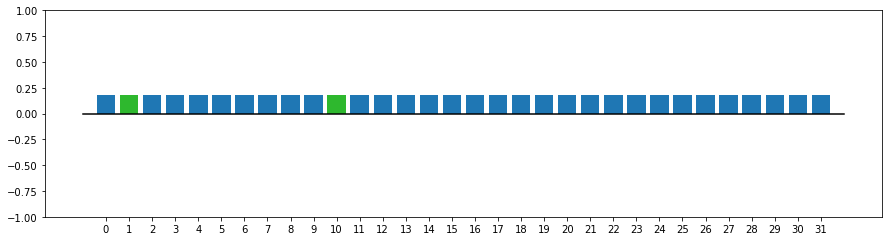

In [148]:
amps = amps_init
plt.figure(figsize=(15, 3.8))
plt.bar(range(n), amps_init, color = colors_ch)
plt.xticks(range(n))
plt.ylim([-1, 1])
plt.plot(np.linspace(-1, n, 100), np.zeros(100), '-k')
plt.show()

In [168]:
def print_grover_rotation(grover_rotations, save = False):
    gr_amps_prep = amps_prep_list[grover_rotations - 1]
    gr_amps_next = amps_next_list[grover_rotations - 1]

    plt.figure(figsize=(15, 3.8))
    plt.bar(range(n), gr_amps_prep, color = colors_ch)
    plt.xticks(range(n))
    plt.ylim([-1, 1])
    plt.plot(np.linspace(-1, n, 100), np.zeros(100), '-k')
    plt.plot(np.linspace(-1, n, 100), np.repeat(np.sum(gr_amps_prep)/t, 100), '-r')
    
    if save:
        plt.savefig("GS_amps_prep_{0:d}.png".format(grover_rotations))
    else:
        plt.show()

    plt.figure(figsize=(15, 3.8))
    plt.bar(range(n), gr_amps_next, color = colors_ch)
    plt.xticks(range(n))
    plt.ylim([-1, 1])
    plt.plot(np.linspace(-1, n, 100), np.zeros(100), '-k')
    plt.plot(np.linspace(-1, n, 100), np.repeat(np.sum(gr_amps_prep)/t, 100), '-r')
    
    if save:
        plt.savefig("GS_amps_next_{0:d}.png".format(grover_rotations))
    else:
        plt.show()

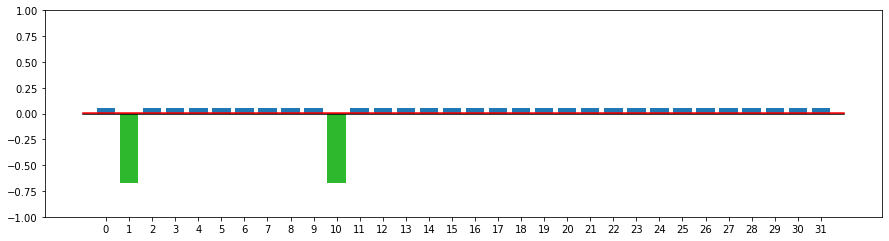

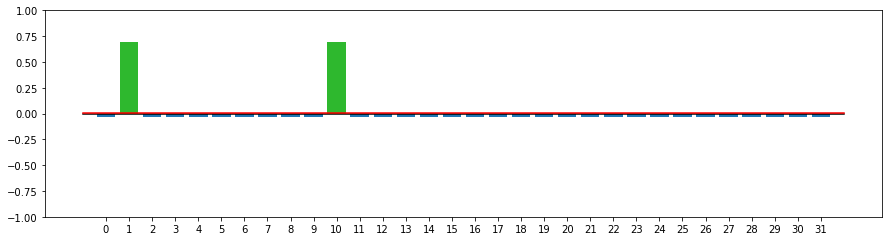

In [169]:
grover_rotations = 3
print_grover_rotation(grover_rotations, save = True)

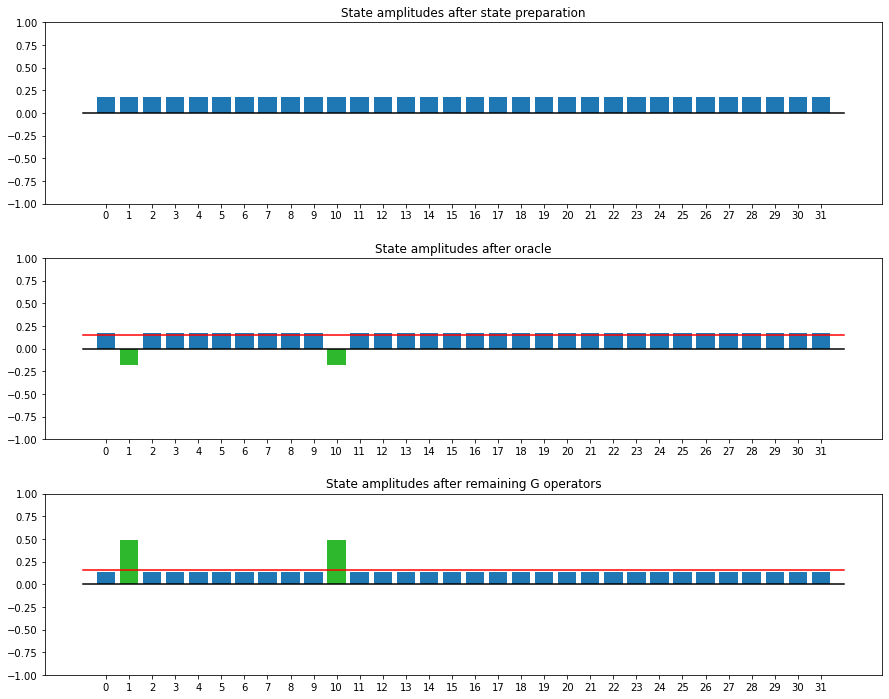

In [160]:
fig, axs = plt.subplots(3, 1, figsize = (15, 12))

axs[0].bar(range(n), amps_init)
axs[0].set_title("State amplitudes after state preparation")
axs[0].set_xticks(range(n))
axs[0].set_ylim([-1, 1])
axs[0].plot(np.linspace(-1, n, 100), np.zeros(100), '-k')

axs[1].bar(range(n), amps_prep_list[0], color = colors_ch)
axs[1].set_title("State amplitudes after oracle")
axs[1].set_xticks(range(n))
axs[1].set_ylim([-1, 1])
axs[1].plot(np.linspace(-1, n, 100), np.zeros(100), '-k')
axs[1].plot(np.linspace(-1, n, 100), np.repeat(np.sum(amps_prep_list[0])/t, 100), '-r')

axs[2].bar(range(n), amps_next_list[0], color = colors_ch)
axs[2].set_title("State amplitudes after remaining G operators")
axs[2].set_xticks(range(n))
axs[2].set_ylim([-1, 1])
axs[2].plot(np.linspace(-1, n, 100), np.zeros(100), '-k')
axs[2].plot(np.linspace(-1, n, 100), np.repeat(np.sum(amps_prep_list[0])/t, 100), '-r')

plt.subplots_adjust(hspace=0.3) 

#plt.show()
plt.savefig('GS_amps.png')

In [ ]:
f, axs = plt.subplots(1, 2, figsize = (15,5))

axs[0].bar(range(16), l1)
axs[0].set_title("Measurement probabilities for \u03C9 = 2.50/16")
axs[0].set_xticks(range(16))
axs[0].set_ylim([0, 1])

axs[1].bar(range(16), l2)
axs[1].set_title("Measurement probabilities for \u03C9 = 9.10/16")
axs[1].set_xticks(range(16))
axs[1].set_ylim([0, 1])

#plt.show()
plt.savefig('QFT_probs.png')